In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

RANDOM_STATE = 42

df = pd.read_csv("diabetes.csv") 
df

,pregnant-times,glucose-concentr,blood-pressure,skin-thickness,insulin,mass-index,pedigree-func,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [152]:
df.isna().sum().sum()

0

In [153]:
df['class'].value_counts()

class
tested_negative    500
tested_positive    268
Name: count, dtype: int64

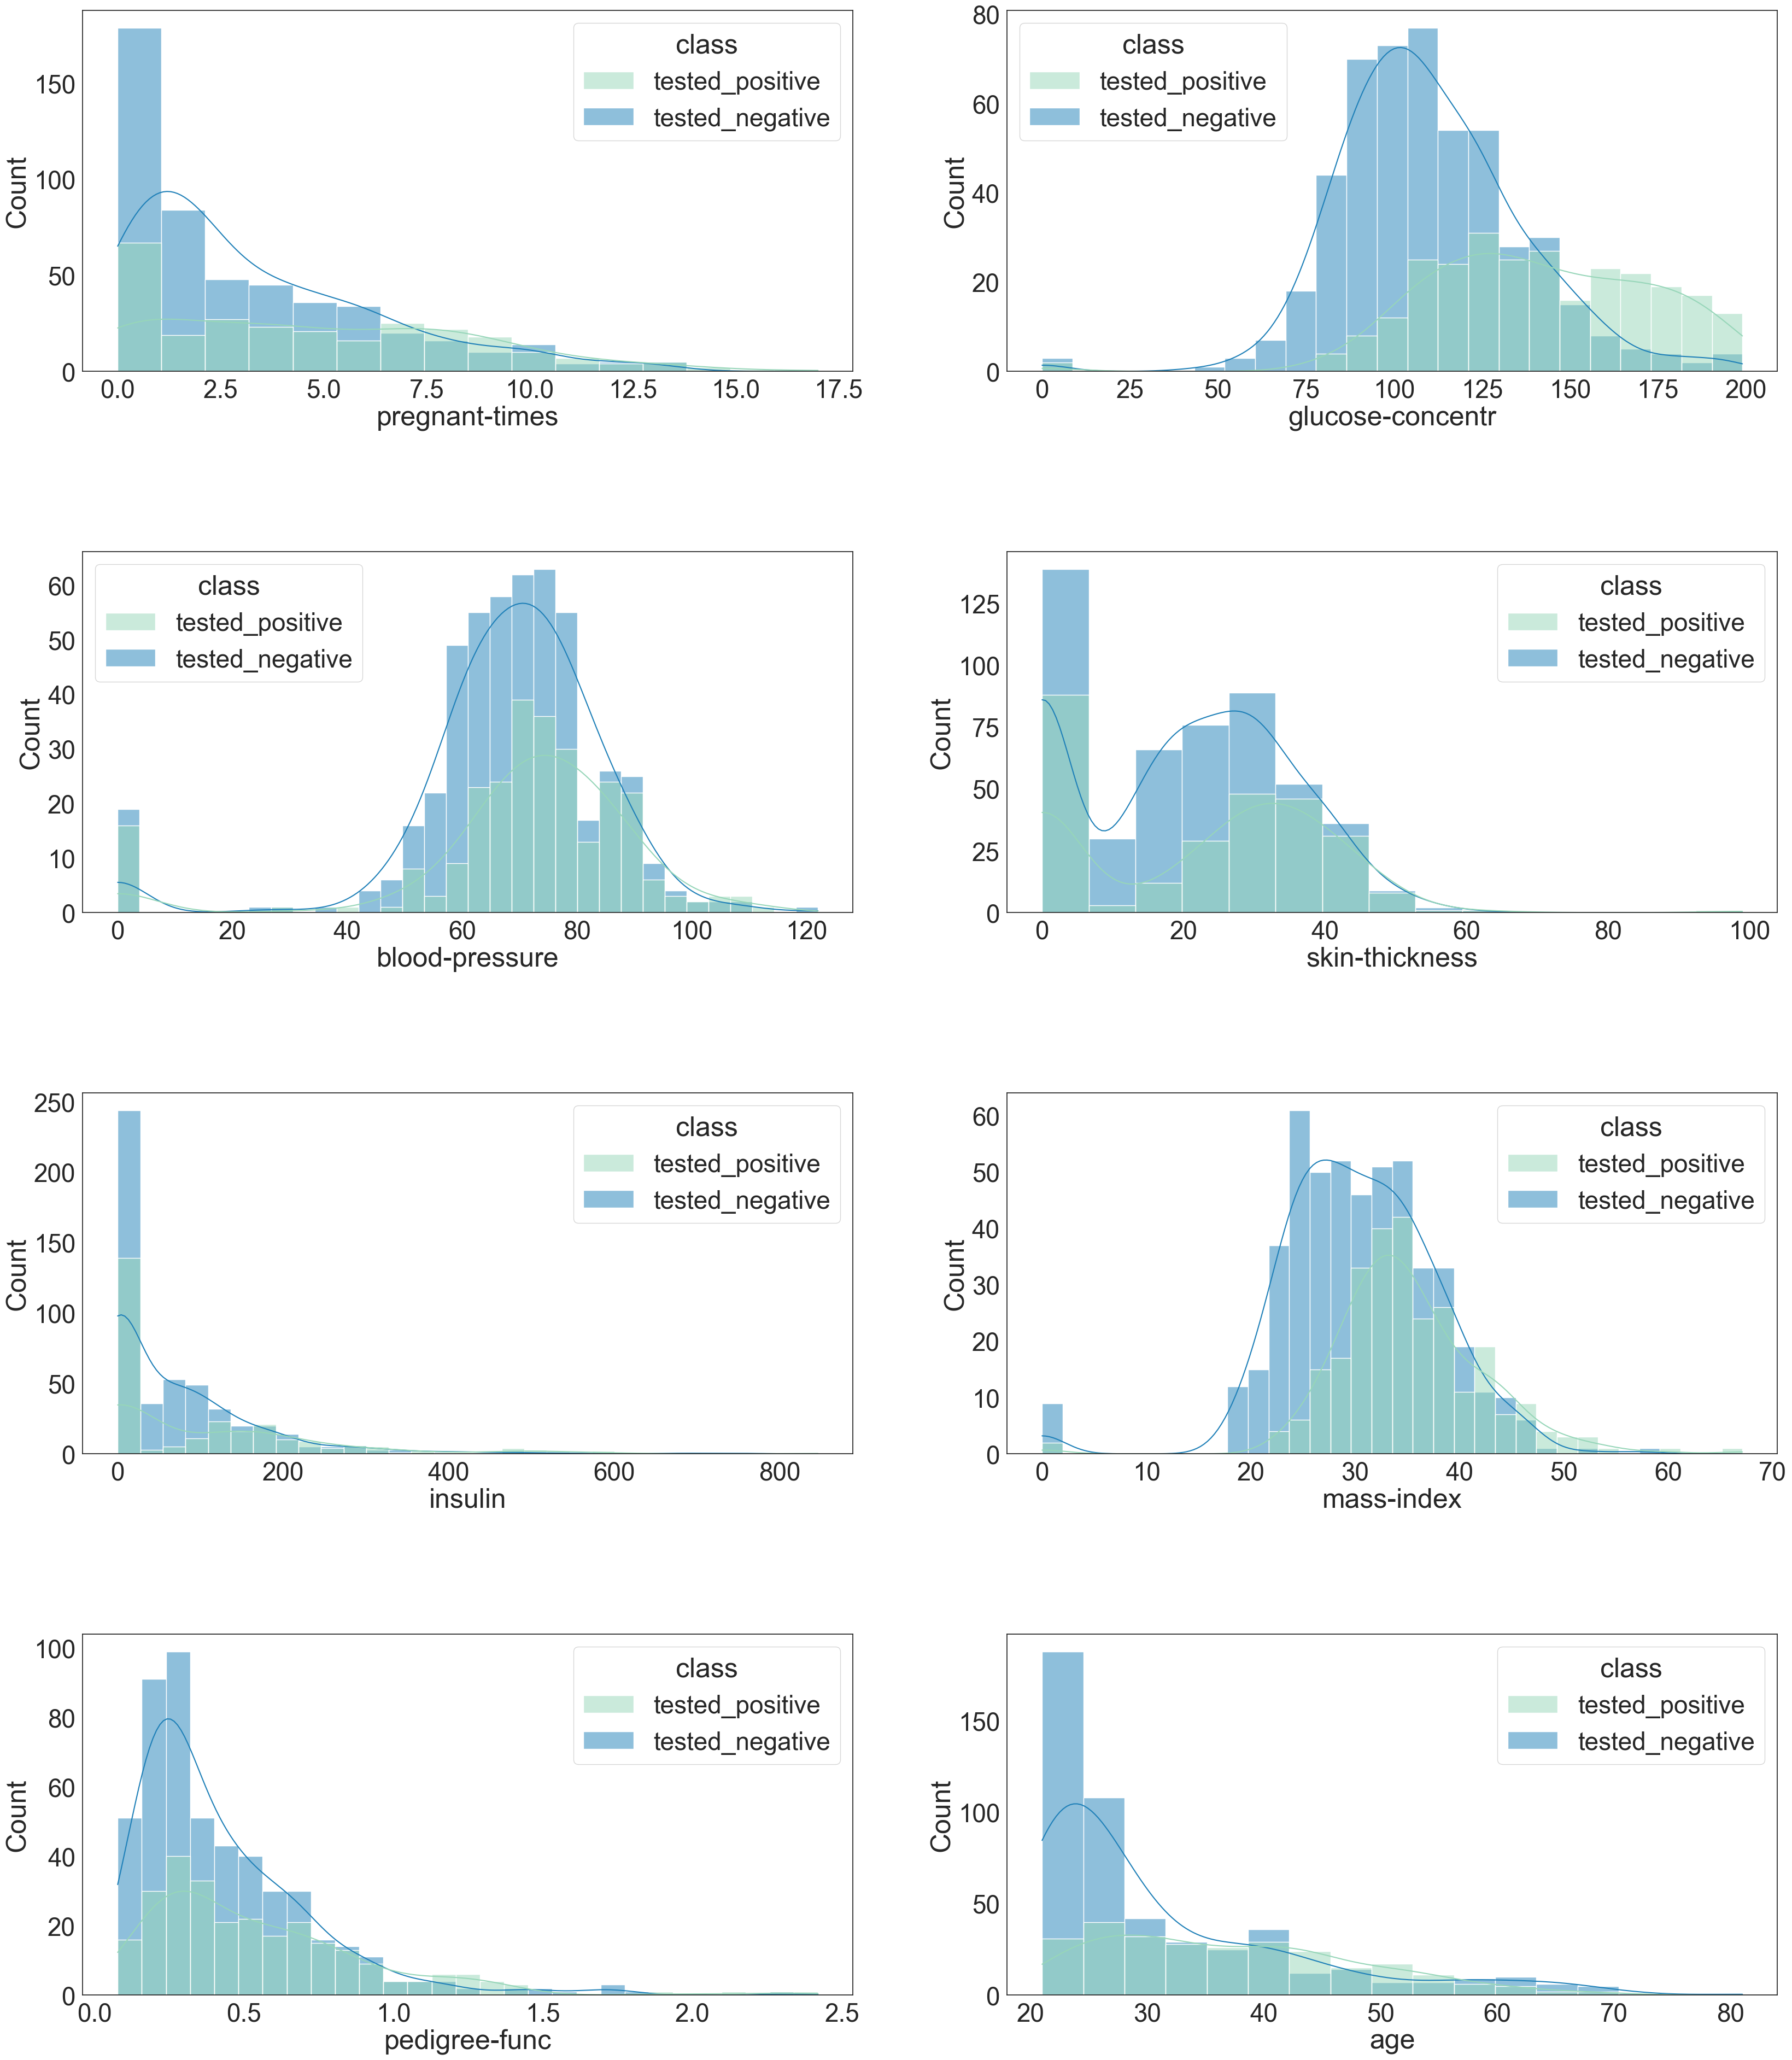

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

feature_names = [cname for cname in df.loc[:,:'age'].columns]

rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="class",kde=True,palette="YlGnBu")
    i = i + 1

In [ ]:
#podzial na zbior testowy (30%) i treningowy (70%) 
(train_set, test_set) = train_test_split(df.values, train_size=0.7, random_state=RANDOM_STATE) 

print(test_set) 
print(test_set.shape[0]) 

[[7 178 84 ... 0.331 41 'tested_positive']
 [9 57 80 ... 0.096 41 'tested_negative']
 [7 114 76 ... 0.466 31 'tested_negative']
 ...
 [6 134 70 ... 0.542 29 'tested_positive']
 [1 117 60 ... 0.466 27 'tested_negative']
 [2 197 70 ... 0.158 53 'tested_positive']]
231


In [165]:
df_train = pd.DataFrame(train_set)
df_train[8].value_counts(normalize=True)

8
tested_negative    0.649907
tested_positive    0.350093
Name: proportion, dtype: float64

In [166]:
df_test= pd.DataFrame(test_set)
df_test[8].value_counts(normalize=True)

8
tested_negative    0.65368
tested_positive    0.34632
Name: proportion, dtype: float64

In [167]:
train_data = train_set[:, 0:8] 
train_labels = train_set[:, 8] 

test_data = test_set[:, 0:8] 
test_labels = test_set[:, 8] 

# positive - 1, negative -0 
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
test_labels = encoder.fit_transform(test_labels)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Train data shape: (537, 8)
Test data shape: (231, 8)
Train labels shape: (537,)
Test labels shape: (231,)


In [67]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
clf = MLPClassifier(
    hidden_layer_sizes=(6, 6, 3),
    activation='relu', # 'tanh', 'logistic', 'identity', 'relu'
    solver='adam',
    max_iter=1000,
    random_state=RANDOM_STATE,
    batch_size=32
)

clf.fit(train_data, train_labels) 

train_pred = clf.predict(train_data)
test_pred = clf.predict(test_data)

train_acc = accuracy_score(train_labels, train_pred)
test_acc = accuracy_score(test_labels, test_pred)

print(f"Dokładność na zbiorze treningowym: {train_acc:.4f}")
print(f"Dokładność na zbiorze testowym: {test_acc:.4f}")

Dokładność na zbiorze treningowym: 0.8007
Dokładność na zbiorze testowym: 0.7489


In [ ]:
# clf = MLPClassifier(
#     hidden_layer_sizes=(6, 6, 3),
#     activation='relu', # 'tanh', 'logistic', 'identity', 'relu'
#     solver='adam',
#     max_iter=500,
#     random_state=RANDOM_STATE,
#     batch_size=32
# )
# Dokładność na zbiorze treningowym: 0.8529
# Dokładność na zbiorze testowym: 0.7662

In [114]:
train_pred = clf.predict(train_data)
test_pred = clf.predict(test_data)

train_acc = accuracy_score(train_labels, train_pred)
test_acc = accuracy_score(test_labels, test_pred)

print(f"Dokładność na zbiorze treningowym: {train_acc:.4f}")
print(f"Dokładność na zbiorze testowym: {test_acc:.4f}")

Dokładność na zbiorze treningowym: 0.8045
Dokładność na zbiorze testowym: 0.7576


In [ ]:
import numpy as np
from tqdm import tqdm

max_iter = 500
batch_size = 10
n_batches = len(train_data) // batch_size

# Definiowanie klasyfikatora
clf = MLPClassifier(
    hidden_layer_sizes=(6, 6, 3),
    activation='relu',  # 'tanh', 'logistic', 'identity', 'relu'
    solver='adam',
    max_iter=1,  # Ustalamy na 1, aby zaktualizować model w pętli
    random_state=RANDOM_STATE
)

# Lista do przechowywania strat i dokładności
losses = []
accuracies = []

# Pętla treningowa
for epoch in tqdm(range(max_iter)):
    for i in range(n_batches):
        # Pobieranie partii danych
        batch_data = train_data[i * batch_size:(i + 1) * batch_size]
        batch_labels = train_labels[i * batch_size:(i + 1) * batch_size]
        
        # Uczenie na danej partii
        clf.partial_fit(batch_data, batch_labels, classes=np.unique(train_labels))
        
    # Obliczanie straty i dokładności po każdej epoce
    losses.append(clf.loss_)
    predictions = clf.predict(train_data)
    accuracy = accuracy_score(train_labels, predictions)
    accuracies.append(accuracy)

    # print(f'Epoka {epoch + 1}/{max_iter} - Strata: {clf.loss_:.4f}, Dokładność: {accuracy:.4f}')

print('Ostateczne wartości:')
print(f'Strata: {clf.loss_:.4f}')
print(f'Dokładność na zbiorze treningowym: {accuracies[-1]:.4f}')

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:40<00:00, 12.46it/s]

Ostateczne wartości:
Strata: 0.1885
Dokładność na zbiorze treningowym: 0.8287


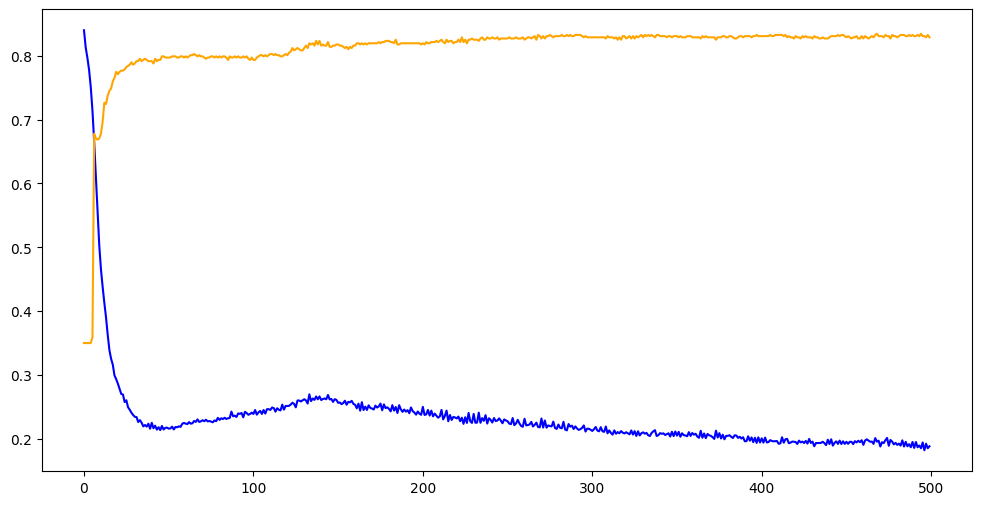

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(losses, label='Strata (Loss)', color='blue')
plt.plot(accuracies, label='Dokładność (Accuracy)', color='orange')


In [84]:
train_pred = clf.predict(train_data)
test_pred = clf.predict(test_data)

train_acc = accuracy_score(train_labels, train_pred)
test_acc = accuracy_score(test_labels, test_pred)

print(f"Dokładność na zbiorze treningowym: {train_acc:.4f}")
print(f"Dokładność na zbiorze testowym: {test_acc:.4f}")

Dokładność na zbiorze treningowym: 0.8250
Dokładność na zbiorze testowym: 0.7576


In [70]:
# 1000 iteracji
# Dokładność na zbiorze treningowym: 0.7989
# Dokładność na zbiorze testowym: 0.7532
# 500 iteracji
# Dokładność na zbiorze treningowym: 0.7989
# Dokładność na zbiorze testowym: 0.7532

In [85]:
conf_matrix = confusion_matrix(test_labels, test_pred)
print('Macierz błędu:')
print(conf_matrix)

Macierz błędu:
[[126  25]
 [ 31  49]]


In [ ]:
# Macierz błędu:
# [[122  29]
#  [ 28  52]]
# FN, jest ich 28 i są gorsze w przypadku wykrywania chorób


In [145]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Definiowanie przestrzeni przeszukiwania
param_distributions = {
    'hidden_layer_sizes': [(6, 6, 3), (6, 3, 3), (6, 6, 6), (4, 4, 2), (2, 4, 2), (4, 6, 2), (6, 4, 2), (6, 6, 6, 3)]
}

# Tworzenie klasyfikatora
clf = MLPClassifier(max_iter=500, random_state=42, batch_size=32)

# RandomizedSearchCV z 10 losowymi kombinacjami, 3-krotną walidacją krzyżową
random_search = RandomizedSearchCV(
    clf, 
    param_distributions, 
    n_iter=8,  # Liczba losowych konfiguracji do sprawdzenia
    cv=10,  # 3-krotna walidacja krzyżowa
    scoring='accuracy', 
    random_state=42,
    n_jobs=-1  # Użycie wielu rdzeni do przyspieszenia obliczeń
)

# Dopasowanie do zbioru treningowego
random_search.fit(train_data, train_labels)

# Najlepsze hiperparametry
print("Najlepsze hiperparametry:", random_search.best_params_)

# Sprawdzenie dokładności na zbiorze testowym
best_model = random_search.best_estimator_
test_predictions = best_model.predict(test_data)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Dokładność na zbiorze testowym: {test_accuracy:.4f}')


Najlepsze hiperparametry: {'hidden_layer_sizes': (6, 6, 6)}
Dokładność na zbiorze testowym: 0.7576
